<a href="https://colab.research.google.com/github/Jaime-Simoes/TM_Project1/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Data Exploration (1st step guidelines)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets

train_df = pd.read_excel("train.xlsx")
train_reviews_df = pd.read_excel("train_reviews.xlsx")

test_df = pd.read_excel("test.xlsx")
test_reviews_df = pd.read_excel("test_reviews.xlsx")

In [5]:
train_df.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [6]:
train_df.shape

(6248, 4)

In [7]:
train_reviews_df.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('comments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('comments')):
  _plot_series(series, series_name, i)
  fig.legend(title='comments', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [8]:
train_reviews_df.shape

(361281, 2)

In [9]:
test_df.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [10]:
test_df.shape

(695, 3)

In [11]:
test_reviews_df.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [12]:
test_reviews_df.shape

(41866, 2)

In [19]:
index_values_train_df = train_df['index'].value_counts()
print(index_values_train_df)

# Each index (Airbnb location) appears once
# goes from 1 to 6248

index
1       1
4150    1
4172    1
4171    1
4170    1
       ..
2081    1
2080    1
2079    1
2078    1
6248    1
Name: count, Length: 6248, dtype: int64


In [20]:
index_values_train_reviews_df = train_reviews_df['index'].value_counts()
print(index_values_train_reviews_df)

# Different amount of reviews per place

index
265     891
3396    765
1147    678
4106    617
954     583
       ... 
6092      1
376       1
4480      1
1759      1
6139      1
Name: count, Length: 4245, dtype: int64


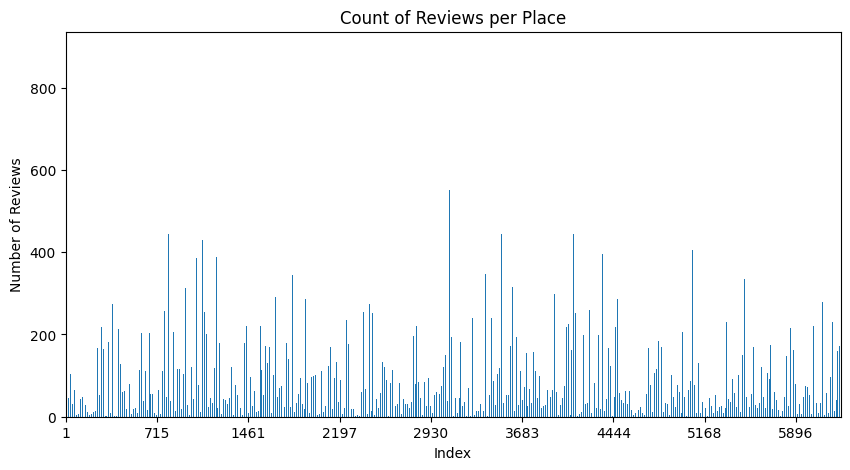

In [32]:
# Get distribution of amount per each index

index_values_train_reviews_df = train_reviews_df['index'].value_counts()

sorted_index_values_train_reviews_df = index_values_train_reviews_df.sort_index()
plt.figure(figsize=(10, 5))
sorted_index_values_train_reviews_df.plot(kind='bar')

plt.xticks(range(0, len(sorted_index_values_train_reviews_df), 500), rotation=0)

plt.title('Count of Reviews per Place')
plt.xlabel('Index')
plt.ylabel('Number of Reviews')
plt.show()

In [34]:
# Get the places that don't have reviews

missing_indexes = set(range(1, 6249)) - set(index_values_train_reviews_df.index)
amount_missing = len(missing_indexes)      # amount of places with no review

print("Places that don't have reviews:", amount_missing)
print(missing_indexes)

Places that don't have reviews: 2003
{2, 3, 4, 6, 7, 13, 15, 17, 18, 21, 22, 28, 34, 41, 46, 48, 50, 52, 57, 60, 64, 67, 72, 74, 75, 77, 82, 84, 85, 87, 89, 92, 93, 94, 95, 96, 102, 103, 104, 108, 114, 115, 117, 118, 121, 125, 132, 135, 136, 138, 139, 143, 151, 157, 158, 160, 166, 170, 176, 178, 180, 186, 187, 189, 191, 200, 202, 206, 209, 213, 215, 216, 228, 231, 234, 236, 237, 239, 240, 252, 255, 256, 258, 260, 261, 263, 264, 266, 267, 268, 271, 276, 281, 284, 286, 288, 296, 297, 299, 302, 304, 306, 308, 316, 323, 324, 335, 343, 349, 362, 363, 364, 372, 379, 380, 383, 385, 387, 393, 397, 401, 402, 403, 410, 422, 434, 438, 443, 447, 450, 451, 455, 457, 460, 463, 469, 473, 476, 477, 478, 481, 482, 483, 485, 488, 489, 491, 492, 502, 506, 512, 513, 516, 522, 525, 533, 541, 543, 544, 546, 548, 556, 561, 562, 563, 571, 574, 580, 582, 587, 588, 594, 600, 605, 610, 615, 621, 625, 627, 628, 629, 630, 633, 635, 637, 638, 646, 647, 654, 655, 656, 657, 662, 666, 667, 669, 670, 676, 677, 678, 686

In [36]:
(amount_missing / 6248) * 100      # percentage of places with no reviews (very high)

# Do we delete these ones ?? Depends on test statistics. Let's see if we need to predict places in the test set that also don't have reviews
# in the test_reviews set. Because if so we also need to train the model for those instances. Can't change the test dataset!

32.058258642765686

In [ ]:
#ola